# Load and Preprocesss Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Combined_Data.csv')

# Display the first few rows to understand the structure
print(data.head())

# Convert date column to datetime format
data['Date_Sold'] = pd.to_datetime(data['Date_Sold'], errors='coerce')

# Drop rows with missing critical values
data.dropna(subset=['Estimated_market_value', 'Selling_Price', 'Zipcode'], inplace=True)

# Fill missing values for non-critical columns
data.fillna({
    'Beds': data['Beds'].median(),
    'Bathrooms': data['Bathrooms'].median(),
    'Square_Feet': data['Square_Feet'].median(),
    'Lot_Size': data['Lot_Size'].median(),
    'Walk_Score': data['Walk_Score'].median(),
    'Transit_Score': data['Transit_Score'].median(),
    'Bike_Score': data['Bike_Score'].median()
}, inplace=True)

# Ensure numeric columns are properly formatted
numeric_columns = ['Estimated_market_value', 'Selling_Price', 'Square_Feet', 'Lot_Size', 'Walk_Score', 'Transit_Score', 'Bike_Score']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Add a new column for year extracted from the date
data['Year_Sold'] = data['Date_Sold'].dt.year

   Estimated_market_value  Selling_Price   Date_Sold  Estimated_Monthly_Cost  \
0               2260062.0        1950000  2021-11-19                 10536.0   
1               1723047.0        1850000  2022-05-17                  8632.0   
2               1629260.0        1685000  2022-07-02                  8258.0   
3               1813091.0        1830000  2022-02-21                  8968.0   
4               1163353.0        1090000  2022-03-11                  5342.0   

   Estimated_Rental_Value  Zipcode  Beds  Bathrooms  Square_Feet  \
0                 5263.43    95070   3.0        2.0       1249.0   
1                 4115.00    95070   3.0        2.5       1598.0   
2                 5374.13    95014   3.0        2.0       1487.0   
3                 4848.10    94024   3.0        2.5       1670.0   
4                 3407.00    95015   3.0        2.0       1491.0   

                      Address  ... Estimated_Salesrange_max Company_Adj  \
0          10612 Gascoigne Dr  ... 

# Visualization 1: Heatmap (Correlation Matrix)
Research Question: What are the correlations between key numerical variables?

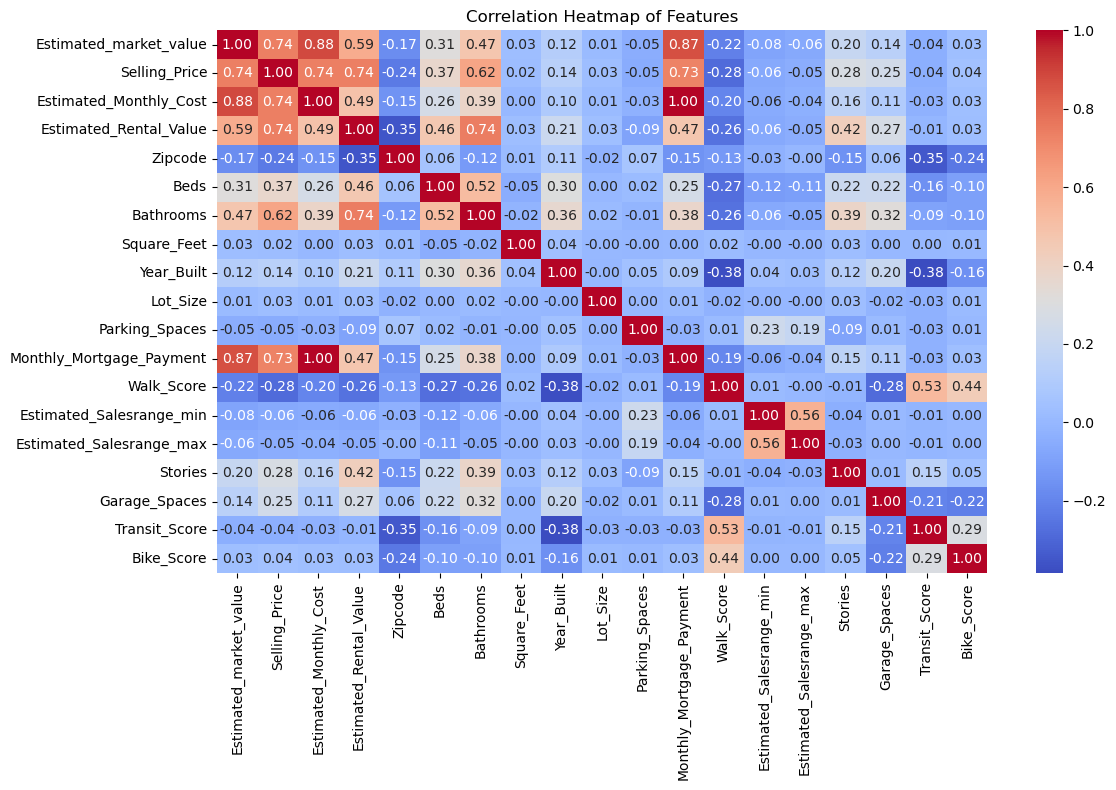

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Combined_Data.csv')

# Convert numeric-looking columns to numeric types
numeric_columns = ['Estimated_market_value', 'Selling_Price', 'Square_Feet', 'Lot_Size', 
                   'Walk_Score', 'Transit_Score', 'Bike_Score', 'Beds', 'Bathrooms', 'Year_Built']

for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Handle missing values (fill with median or drop rows)
numeric_data = numeric_data.fillna(numeric_data.median())

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

# Visualization 2: Box Plot
Research Question: How does proximity to tech company headquarters influence property prices?

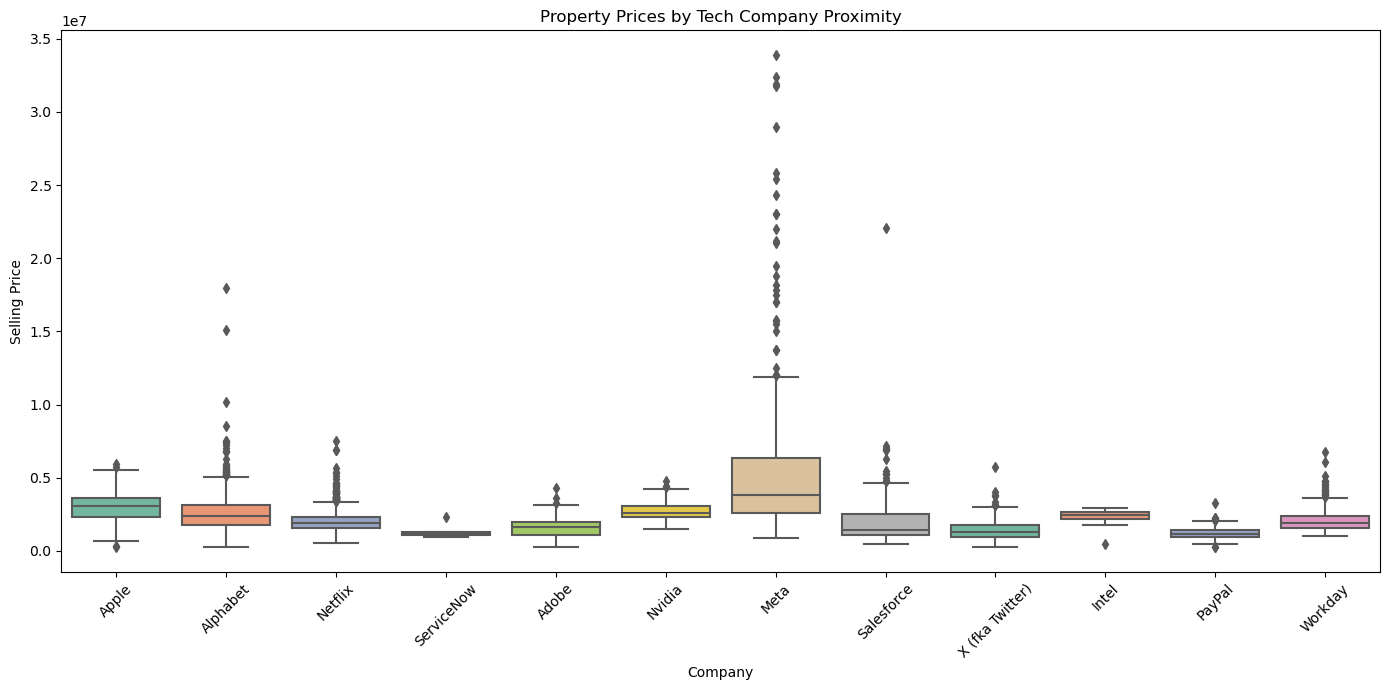

In [5]:
# Boxplot of property prices by company
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Company_Adj', y='Selling_Price', palette='Set2')
plt.title('Property Prices by Tech Company Proximity')
plt.xlabel('Company')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Histogram
Research Question: What is the distribution of property prices?

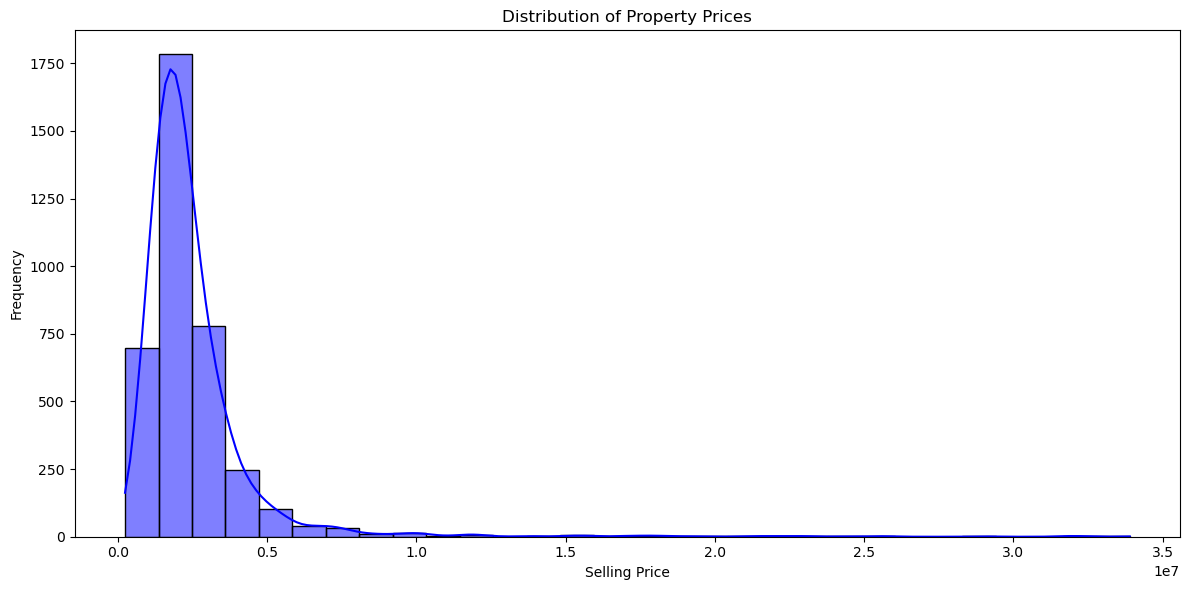

In [6]:
# Histogram of property prices
plt.figure(figsize=(12, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization 4: Bar Chart
Research Question: How do the number of bedrooms affect property prices?

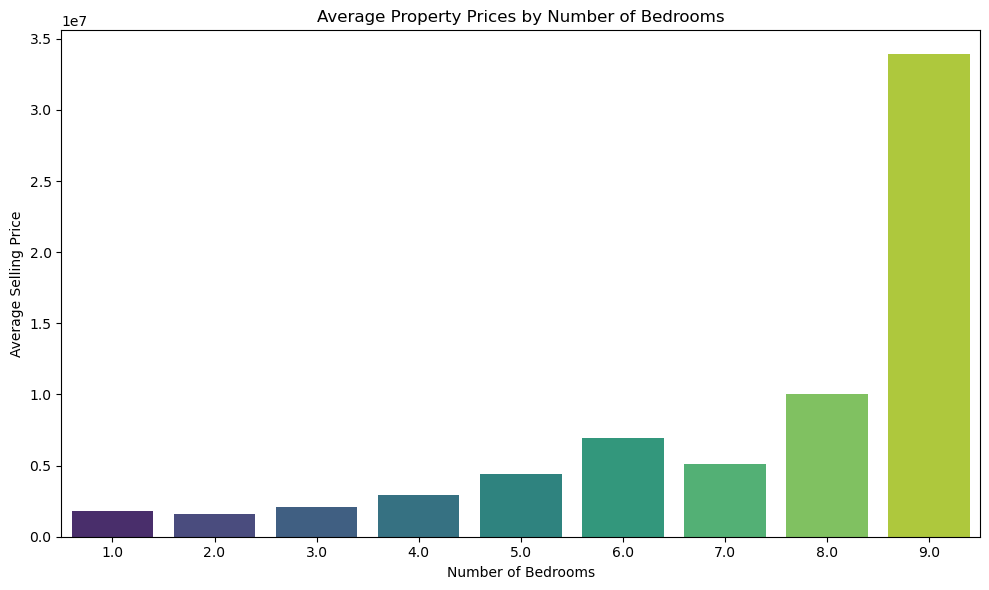

In [ ]:
# Bar chart of average property prices by number of bedrooms
avg_price_by_bedrooms = data.groupby('Beds')['Selling_Price'].mean().reset_index()
avg_price_by_bedrooms = avg_price_by_bedrooms[avg_price_by_bedrooms['Beds'] != 0.0]

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_bedrooms, x='Beds', y='Selling_Price', palette='viridis')
plt.title('Average Property Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Selling Price')
plt.tight_layout()
plt.show()

# Visualization 5: Pie Chart
Research Question: What are the most common property types?

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Count the occurrences of each property type
property_type_counts = data['Stories'].value_counts()

# Prepare data for the pie chart
labels = property_type_counts.index.tolist()  
sizes = property_type_counts.values.tolist()  

fig = go.Figure()

fig.add_trace(go.Pie(
    labels=labels,
    values=sizes,
    pull=[0.1] * len(labels),  
    textinfo='label+percent',
    marker=dict(colors=colors),
    hole=0.3  
))

fig.update_layout(
    title_text=f"Distribution of Property Types (Stories)",
    title_x=0.5, 
    showlegend=True,
    legend=dict(
        orientation="h", 
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig.show()



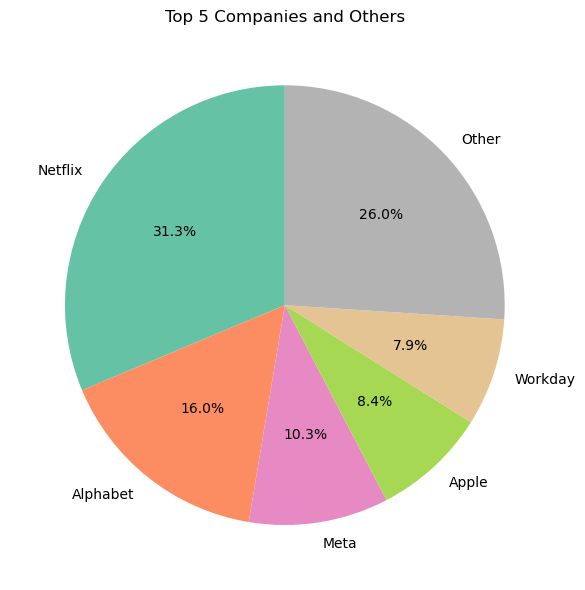

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Combined_Data.csv')

# Count the occurrences of each company
company_counts = data['Company_Adj'].value_counts()

# Group smaller categories into "Other"
threshold = 5  # Minimum number of occurrences to keep a category
company_counts_filtered = company_counts[company_counts >= threshold]
company_counts_filtered['Other'] = company_counts[company_counts < threshold].sum()

# Get the top 5 companies and group the rest as "Other"
top_n = 5
top_companies = company_counts.nlargest(top_n)
top_companies['Other'] = company_counts.iloc[top_n:].sum()

# Plot the pie chart
plt.figure(figsize=(8, 6))
top_companies.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
# Create a 3D-like pie chart using Plotly
import plotly.graph_objects as go

# Prepare data for the pie chart
labels = top_companies.index.tolist()  # Convert index to list
sizes = top_companies.values.tolist()  # Convert values to list

# Create a 3D-like pie chart
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=labels,
    values=sizes,
    pull=[0.1] * len(labels),  # Slices out all sections slightly
    textinfo='label+percent',
    marker=dict(colors=colors),
    hole=0.3  # Creates a donut-like effect for a 3D illusion
))

# Update layout for better presentation
fig.update_layout(
    title_text=f"Top {top_n} Companies and Others",
    title_x=0.5,  # Center the title
    showlegend=True,
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

# Display the chart
fig.show()
plt.title(f'Top {top_n} Companies and Others')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Visualization 6: Scatter Plot
Research Question: What is the relationship between property size and property prices?

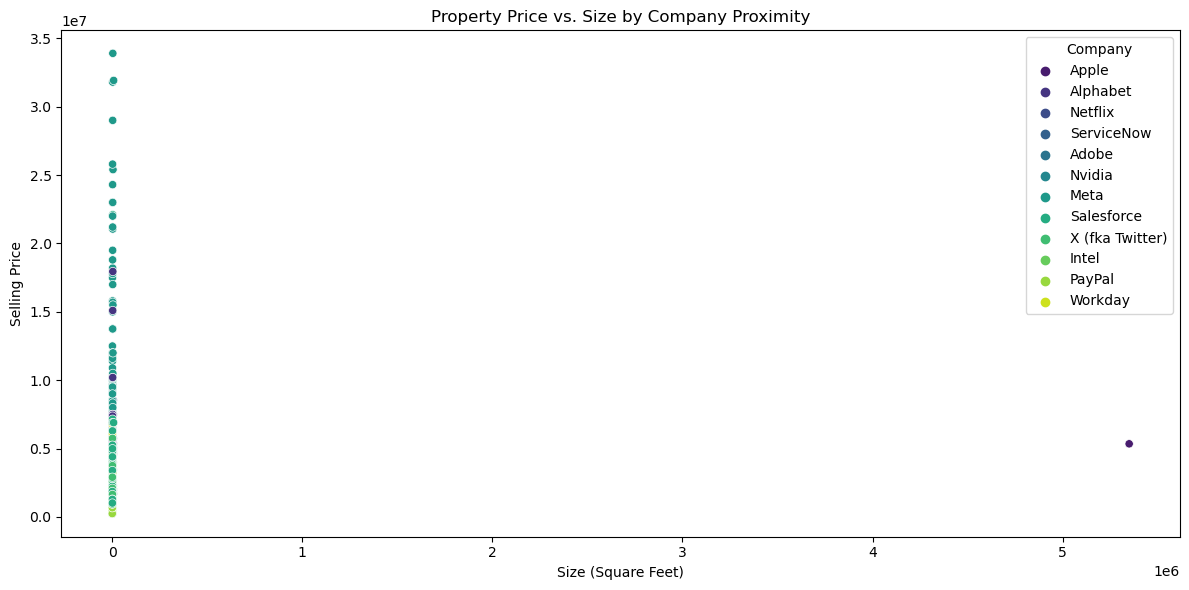

In [9]:
# Scatter plot of property size vs. price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Square_Feet', y='Selling_Price', hue='Company_Adj', palette='viridis')
plt.title('Property Price vs. Size by Company Proximity')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Selling Price')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

# Visualization 7: Line Plot
Research Question: How do seasonal trends impact property prices?

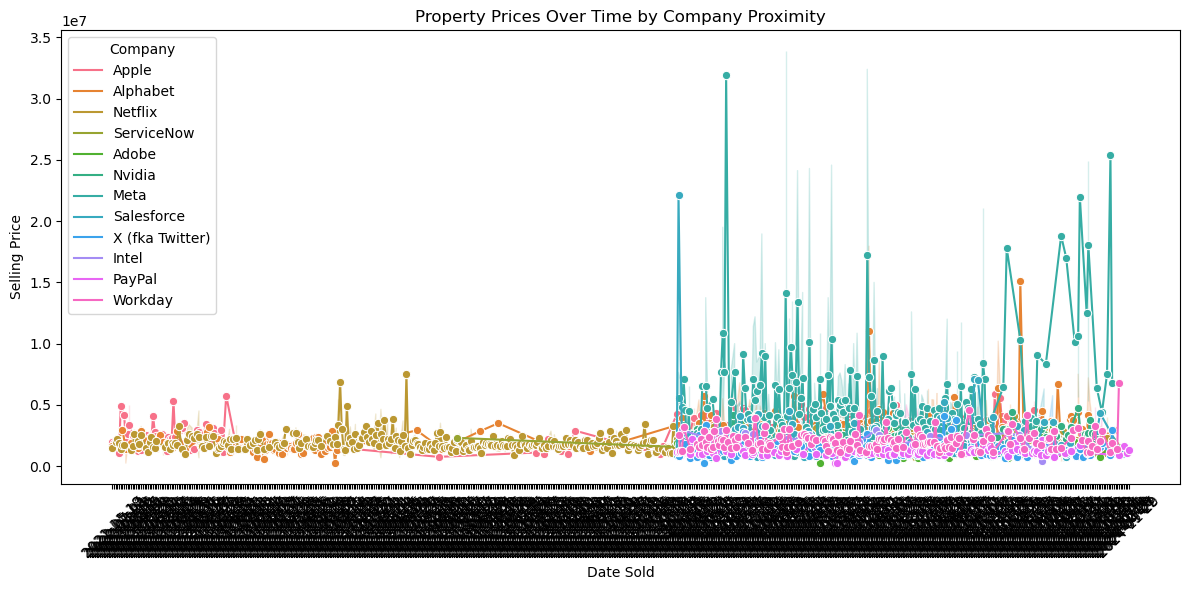

In [10]:
# Line plot of property prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date_Sold', y='Selling_Price', hue='Company_Adj', marker='o')
plt.title('Property Prices Over Time by Company Proximity')
plt.xlabel('Date Sold')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.tight_layout()
plt.show()

# Boxplot of property prices by zip code:

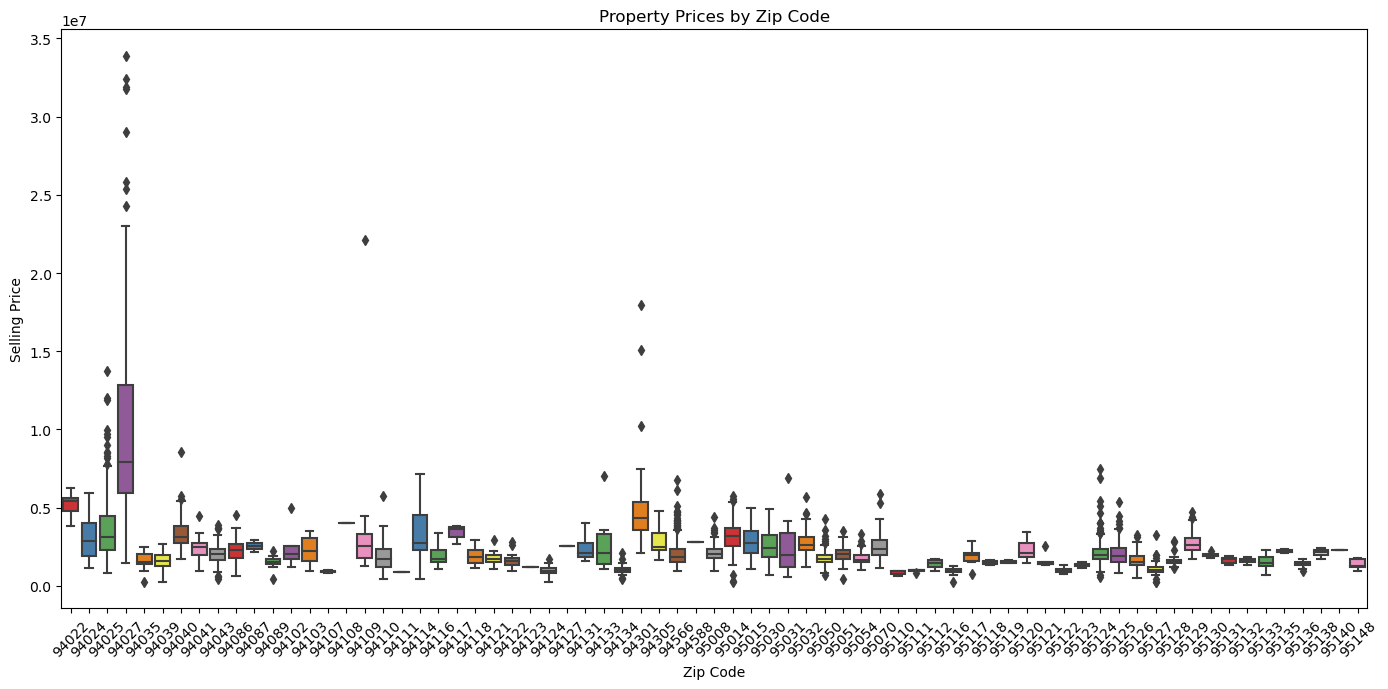

In [11]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Zipcode', y='Selling_Price', palette='Set1')
plt.title('Property Prices by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()